<a href="https://colab.research.google.com/github/Ananya2003Gupta/Heart-Failure-Prediction/blob/main/III_Feature_Selection_using_Chi_square_test_%26_Anova_Test%2C_RFE_%2C_RFI_(HeartFailurePrediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b> <h2> Team Members: </h2> <b>

---

Name: Ananya Gupta

Enrollment Number: 00401012021

Email id: ananya004btcse21@igdtuw.ac.in

---

Name: Astha Varshney

Enrollment Number: 11901012021

Email id: astha119btcse21@igdtuw.ac.in




---



<br>
<br>
<br>

<b><h1 align= "center">     MAJOR PROJECT: HEART FAILURE PREDICTION DATASET

<p align="center" > <img src="https://i.pinimg.com/236x/c8/75/0e/c8750ecdc3d2a16e3ac0b4b8f72738cc.jpg" width="400px" height="300px" > </p>

<b> <h1 align="center"> INDEX


---



---





1. [Introduction](#scrollTo=oZ5MYi6oSdlN&line=10&uniqifier=1)
2. [Data Analysis](#scrollTo=NNiESp8zLUm9&line=1&uniqifier=1)
3. [Machine Learning Models](#scrollTo=QZn8mlKgME5_&line=1&uniqifier=1)
4. [Feature Selection](#scrollTo=NlLNAqUOnqw4)
5. [References](#scrollTo=Qwv91_pNG2EE)




---
<br>
<br>
<br>


<b><h1 align="center"> INTRODUCTION


---



---



<p align="justify">

*   Cardiovascular disease commonly called heart failure happens when the heart cannot pump enough blood and oxygen to support other organs in your body. Heart failure is a serious condition.
*   Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
*   Heart failure (HF) affects more than 64 million individuals worldwide. In developed countries, the prevalence of known heart failure is generally estimated at 1% to 2% of the general adult population. 
*   A recent meta-analysis including over 1.5 million all-type heart failure patients, estimated the 1, 2, 5 and 10-year survival to be 87%, 73%, 57% and 35%, respectively </p>




---



<p align="justify">


*   Machine learning (ML) proves to be effective in assisting in making decisions and predictions from the large quantity of data produced by the healthcare industry.
*   The dataset we are using for the above analysis contains 12 features that can be used to predict mortality by heart failure.


</p>





---

<br>
<br>
<br>

# <b><h1 align="center"> DATA ANALYSIS


---



---



In [ ]:
#Importing python libraries

#Data Preprocessing
import numpy as np 
import pandas as pd
from sklearn.preprocessing import StandardScaler as ss 

#Data Visualization 
import plotly.express as px 
from plotly.subplots import make_subplots 
from matplotlib import pyplot as plt 
import seaborn as sns 
import plotly.graph_objects as go

#Machine Learning Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import lightgbm as lgb
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

#Model Training and Evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix , precision_score, recall_score
from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_auc_score
from sklearn import model_selection
from sklearn import datasets
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest 
import statsmodels.api as sm  
from statsmodels.formula.api import ols  
import pandas.tseries  
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel


%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Enabling GPU support for more computationally demanding tasks.

import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
#Uploading dataset from local computer

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving heart_failure_clinical_records_dataset.csv to heart_failure_clinical_records_dataset.csv
User uploaded file "heart_failure_clinical_records_dataset.csv" with length 12239 bytes


In [ ]:
#Loading the dataset

df= pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [ ]:
#Rendering the dataset into an interactive table that can be filtered, sorted, and explored dynamically.

%load_ext google.colab.data_table

In [ ]:
#Printing the dataframe

df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [ ]:
#Display all the column/attribute names

df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [ ]:
# It gives the order of the dataframe (rows/records, columns/attributes)

df.shape

(299, 13)



---

<br>
<br>

<b> <h3> There are 13 columns in the dataset used. The dataset is a collection of 299 entries of individuals data. <h3> </b>
<h2> Description of Columns: </h2>
<h4>
1. age: Age of the individuals. Age is the most important risk factor in developing cardiovascular or heart diseases, with approximately a tripling of risk with each decade of life
<br>
<br>
2. anaemia: Displays if there is any decrease of red blood cells or hemoglobin. Anaemia is the the reduction in the red blood cell volume and can be very impactful on the progression of heart failure 
<ul>
 <li> 0- Non-Anaemic</li>
 <li> 1- Anaemic</li>
</ul>
<br>
3. creatinine_phosphokinase: Displays the level of the CPK enzyme in the blood (mcg/L). High levels of CPK usually indicate some sort of stress or injury. It is an an enzyme or a protein that helps to elicit chemical changes in your body. Total CPK normal values: 10 to 120 micrograms per liter
<br>
<br>
4. diabetes: Displays if the patient has diabetes. Diabetes increases your risk of heart attack due to not producing enough of insulin or not responding to insulin properly causes your body’s blood sugar levels to rise.
<ul> 
<li>0: Non-Diabetic</li>
<li>1: Diabetic</li>
</ul>
<br>
5. ejection_fraction: Displays the percentage of blood leaving the heart at each contraction. EF is a measurement, expressed as a percentage, of how much blood the left ventricle pumps out with each contraction. This indication of how well your heart is pumping out blood can help to diagnose and track heart failure. A normal heart’s ejection fraction may be between 50 and 70 percent.
<br>
<br>
6. high_blood_pressure: Displays if the patient has hypertension. Over time, high blood pressure can damage arteries that feed your heart. High blood pressure that occurs with other conditions, such as obesity, high cholesterol or diabetes, increases your risk even more
<ul>
<li> 0- Blood Pressure: Normal</li>
<li>1- Blood Pressure: High </li>
</ul>
<br>
7. platelets: Displays the count of platelets in the blood (kiloplatelets/mL). Platelets are colorless blood cells that help blood clot. The normal number of platelets in the blood is 150,000 to 400,000 platelets per microliter (mcL) or 150 to 400 × 109/L.
<br>
<br>
8. serum_creatinine: displays the level of serum creatinine in the blood (mg/dL). An increased level of creatinine may be a sign of poor kidney function. The normal values by age: 0.9 to 1.3 mg/dL for adult males. 0.6 to 1.1 mg/dL for adult females. 0.5 to 1.0 mg/dL for children ages 3 to 18 years.
<br>
<br>
9. serum_sodium: Displays the level of serum sodium in the blood (mEq/L). The normal range for blood sodium levels is 135 to 145 milliequivalents per liter (mEq/L).
<br>
<br>
10. sex: Displays the gender of the individual. Men are at greater risk of heart disease than pre-menopausal women. If a female has diabetes, she is more likely to develop heart disease than a male with diabetes.
<ul>
<li> 0: Female </li>
<li> 1: Male </li>
</ul>
<br>
11. smoking: Displays if the patient smokes or not. Smoking is a major risk factor for the development of heart failure (HF). Yet, little is known about smoking's effects on the health status of established HF patients.
<ul>
<li> 0: Non-smoker </li>
<li> 1: Smoker </li>
</ul>
<br>
12. time: Displays the number of days in the Follow-up period. Outpatient follow-up within 14 days after HF exacerbation requiring hospitalization or emergency department visit is associated with better outcomes, particularly if the follow-up is with a familiar physician.
<br>
<br>
13. DEATH_EVENT: Displays if the patient deceased during the follow-up period. 
<ul>
<li> 0: Alive </li>
<li>1: Deceased </li>
</ul>
</h4>

# <b><h1 align="center"> MACHINE LEARNING MODELS </h1> </b>


---



---



<h3> <b> The classification models used in this problem are as follows: </b></h3>
<h4>
<ul>
<li> Logistic Regression </li>
<li> Random Forest Classifier</li>
<li> K-Nearest Neighbour (KNN) Classifier </li>
<li> Decision Tree Classifier</li>
<li> Naive Bayes Classifier </li>
<li> SVC (SVM Classifier)</li>
<li> LightGBM Classifier</li>
<li> XGBoost Classifier</li>
</h4>



---

<br>
<br>

In [ ]:
x=df.drop(columns=['DEATH_EVENT'])
y=df['DEATH_EVENT']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler as ss
scs = ss()
x_train = scs.fit_transform(x_train)
x_test = scs.transform(x_test)

In [ ]:
model_test={}

##<h4> Splitting for RFE

In [ ]:
X=df[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'serum_creatinine', 'time']]
Y=df['DEATH_EVENT']

In [ ]:
from sklearn.model_selection import train_test_split
xf_train,xf_test,yf_train,yf_test=train_test_split(X,Y,test_size=0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler as ss
scs = ss()
xf_train = scs.fit_transform(xf_train)
xf_test = scs.transform(xf_test)

## <h3> Splitting for Random Forest Importance

In [ ]:
X=df[['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','time']]
Y=df['DEATH_EVENT']

In [ ]:
from sklearn.model_selection import train_test_split
xr_train,xr_test,yr_train,yr_test=train_test_split(X,Y,test_size=0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler as ss
scs = ss()
xr_train = scs.fit_transform(xr_train)
xr_test = scs.transform(xr_test)

#<b><h2 align="center"> FEATURE SELECTION

---



---



In [ ]:
chi_test={}

In [ ]:
anova_test={}

##<h3> SEX

In [ ]:
Sex_Death = pd.pivot_table(dv,index=['sex'],columns=['DEATH_EVENT'],aggfunc='size')
Sex_Death

DEATH_EVENT,Alive,Deceased
sex,,
Female,71,34
Male,132,62


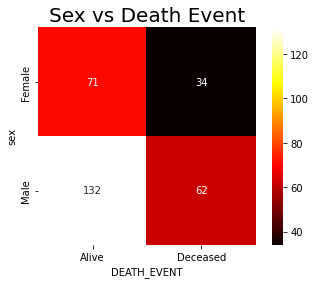

In [ ]:
sns.heatmap(Sex_Death,annot=True, fmt='g',square=True,cmap='hot')
plt.title('Sex vs Death Event',fontsize=20)
plt.show()

299 data rows are present in the dataset. In order to see whether there is a bias in the data, we will do chi square test with an assumption that there is no bias between the columns.

In [ ]:
SexRatio = Sex_Death.sum(axis=1)/299
SexRatio

sex
Female    0.351171
Male      0.648829
dtype: float64

We see that 35.12% of individuals whose details are provided in the existing dataset are female while 64.88% are males.


In [ ]:
TotalSex_Death = Sex_Death.sum(axis=0)/299
TotalSex_Death

DEATH_EVENT
Alive       0.67893
Deceased    0.32107
dtype: float64

32.10% of all people suffered heart failure

If we have null hypothesis as 'The Heart Failure does not depend on the sex of people', then we expect the distribution to be have similar proportions in all columns. That same proportion of people of both survived.

In [ ]:
SexRatio.to_frame()@(TotalSex_Death.to_frame().T) 
# These are the proportion of people expected with null hypothesis

DEATH_EVENT,Alive,Deceased
sex,,
Female,0.23842,0.11275
Male,0.44051,0.20832


In [ ]:
exp = round(SexRatio.to_frame()@(TotalSex_Death.to_frame().T)*299)
exp
# This is the number of people in all classes and survival history expected.

DEATH_EVENT,Alive,Deceased
sex,,
Female,71.0,34.0
Male,132.0,62.0


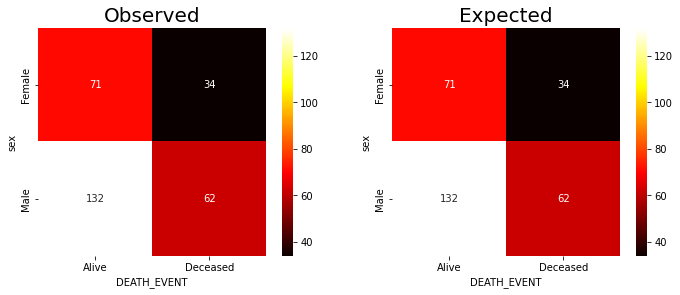

In [ ]:
plt.figure(figsize=(10,4))

plt.subplot('121')
sns.heatmap(Sex_Death,annot=True, fmt='g',square=True,cmap='hot')
plt.title('Observed',fontsize=20)

plt.subplot('122')
sns.heatmap(exp,annot=True, fmt='g',square=True,cmap='hot')
plt.title('Expected',fontsize=20)
plt.tight_layout()


plt.show()

As there is no difference between the expected and observed distributions, it is possible that heart failure event doesn't depend upon the sex of an individual. To confirm it, we will find the Chi value and P value.

In [ ]:
Chi_table = ((Sex_Death - exp)**2)/exp
Chi_table

DEATH_EVENT,Alive,Deceased
sex,,
Female,0.0,0.0
Male,0.0,0.0


In [ ]:
from scipy.stats.distributions import chi2

Chi_value = Chi_table.sum().sum()

p_value = chi2.sf(Chi_value,1)

print("Chi square value is ",Chi_value)
print("P value is",p_value)

Chi square value is  0.0
P value is 1.0


In [ ]:
#Chi square test from contigency table
from scipy import stats
chi2_stat, p_val, dof, ex = stats.chi2_contingency(Sex_Death)

print("Chi square value is ",chi2_stat)
print("P value is",p_val)
print("Degrees of Freedom:",dof)

Chi square value is  0.0
P value is 1.0
Degrees of Freedom: 1


In [ ]:
chi_test['Sex']=[chi2_stat, p_val, dof]

Here we see that the P value is equal to 1 and we can accept the null hypothesis with confidence!

So The Heart Failure event is independent of the sex of individuals...

Having made comparisons between two categorical columns. We can use this methodology for feature selection as well.



---

<br>
<br>


##<h3> ANAEMIA

In [ ]:
Anaemia_Death = pd.pivot_table(dv,index=['anaemia'],columns=['DEATH_EVENT'],aggfunc='size')
Anaemia_Death

DEATH_EVENT,Alive,Deceased
anaemia,,
Anaemic,83,46
Non-Anaemic,120,50


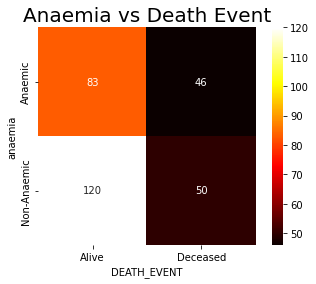

In [ ]:
sns.heatmap(Anaemia_Death,annot=True, fmt='g',square=True,cmap='hot')
plt.title('Anaemia vs Death Event',fontsize=20)
plt.show()

299 data rows are present in the dataset. In order to see whether there is a bias in the data, we will do chi square test with an assumption that there is no bias between the columns.

In [ ]:
AnaemiaRatio = Anaemia_Death.sum(axis=1)/299
AnaemiaRatio

anaemia
Anaemic        0.431438
Non-Anaemic    0.568562
dtype: float64

We see that 43.14% of individuals whose details are provided in the existing dataset are anaemic while 56% are non-anaemic.


In [ ]:
TotalAnaemia_Death = Anaemia_Death.sum(axis=0)/299
TotalAnaemia_Death

DEATH_EVENT
Alive       0.67893
Deceased    0.32107
dtype: float64

32.10% of all people suffered heart failure

If we have null hypothesis as 'The Heart Failure does not depend on Anaemia', then we expect the distribution to be have similar proportions in all columns. That same proportion of people of both survived.

In [ ]:
AnaemiaRatio.to_frame()@(TotalAnaemia_Death.to_frame().T) 
# These are the proportion of people expected with null hypothesis

DEATH_EVENT,Alive,Deceased
anaemia,,
Anaemic,0.292916,0.138522
Non-Anaemic,0.386014,0.182548


In [ ]:
exp = round(AnaemiaRatio.to_frame()@(TotalAnaemia_Death.to_frame().T)*299)
exp
# This is the number of people in all classes and survival history expected.

DEATH_EVENT,Alive,Deceased
anaemia,,
Anaemic,88.0,41.0
Non-Anaemic,115.0,55.0


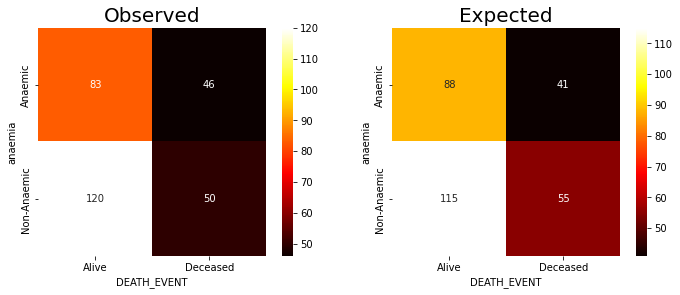

In [ ]:
plt.figure(figsize=(10,4))

plt.subplot('121')
sns.heatmap(Anaemia_Death,annot=True, fmt='g',square=True,cmap='hot')
plt.title('Observed',fontsize=20)

plt.subplot('122')
sns.heatmap(exp,annot=True, fmt='g',square=True,cmap='hot')
plt.title('Expected',fontsize=20)
plt.tight_layout()


plt.show()

There is a visible difference between the expected and the observed distributions. It is possible that heart failure event is related to Anaemia. To confirm it, we will find the Chi value and P value.

In [ ]:
Chi_table = ((Anaemia_Death - exp)**2)/exp
Chi_table

DEATH_EVENT,Alive,Deceased
anaemia,,
Anaemic,0.284091,0.609756
Non-Anaemic,0.217391,0.454545


In [ ]:
from scipy.stats.distributions import chi2

Chi_value = Chi_table.sum().sum()

p_value = chi2.sf(Chi_value,1)

print("Chi square value is ",Chi_value)
print("P value is",p_value)

Chi square value is  1.5657837655451652
P value is 0.2108203711640662


In [ ]:
from scipy import stats
chi2_stat, p_val, dof, ex = stats.chi2_contingency(Anaemia_Death)

print("Chi square value is ",chi2_stat)
print("P value is",p_val)
print("Degrees of Freedom:",dof)

Chi square value is  1.042175485287005
P value is 0.3073160508415107
Degrees of Freedom: 1


In [ ]:
chi_test['Anaemia']=[chi2_stat, p_val, dof]

A p-value of less than or equal to 0.05 is regarded as evidence of a statistically significant result, and in these cases, the null hypothesis should be rejected in favor of the alternative hypothesis.

This p-value would imply a 30% chance of obtaining the collected data if the null hypothesis of the study were true.

So The Heart Failure event is independent of the fact that the person is anemic or non anaemic




---

<br>
<br>


##<h3> DIABETES

In [ ]:
Diabetes_Death = pd.pivot_table(dv,index=['diabetes'],columns=['DEATH_EVENT'],aggfunc='size')
Diabetes_Death

DEATH_EVENT,Alive,Deceased
diabetes,,
Diabetic,85,40
Non-Diabetic,118,56


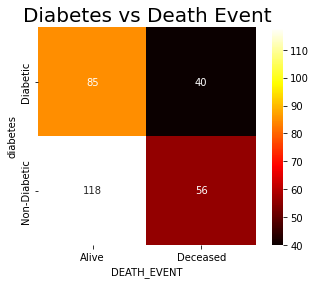

In [ ]:
sns.heatmap(Diabetes_Death,annot=True, fmt='g',square=True,cmap='hot')
plt.title('Diabetes vs Death Event',fontsize=20)
plt.show()

299 data rows are present in the dataset. In order to see whether there is a bias in the data, we will do chi square test with an assumption that there is no bias between the columns.

In [ ]:
DiabetesRatio = Diabetes_Death.sum(axis=1)/299
DiabetesRatio

diabetes
Diabetic        0.41806
Non-Diabetic    0.58194
dtype: float64

We see that 41.80% of individuals whose details are provided in the existing dataset are diabetic while 58.19% are non-diabetic.


In [ ]:
TotalDiabetes_Death = Diabetes_Death.sum(axis=0)/299
TotalDiabetes_Death

DEATH_EVENT
Alive       0.67893
Deceased    0.32107
dtype: float64

32.10% of all people suffered heart failure

If we have null hypothesis as 'The Heart Failure does not depend on Anaemia', then we expect the distribution to be have similar proportions in all columns. That same proportion of people of both survived.

In [ ]:
DiabetesRatio.to_frame()@(TotalDiabetes_Death.to_frame().T) 
# These are the proportion of people expected with null hypothesis

DEATH_EVENT,Alive,Deceased
diabetes,,
Diabetic,0.283834,0.134227
Non-Diabetic,0.395096,0.186844


In [ ]:
exp = round(DiabetesRatio.to_frame()@(TotalDiabetes_Death.to_frame().T)*299)
exp
# This is the number of people in all classes and survival history expected.

DEATH_EVENT,Alive,Deceased
diabetes,,
Diabetic,85.0,40.0
Non-Diabetic,118.0,56.0


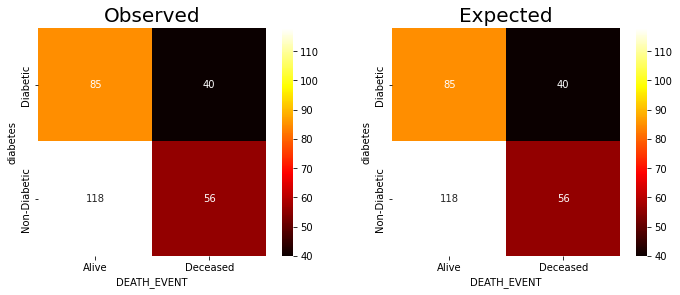

In [ ]:
plt.figure(figsize=(10,4))

plt.subplot('121')
sns.heatmap(Diabetes_Death,annot=True, fmt='g',square=True,cmap='hot')
plt.title('Observed',fontsize=20)

plt.subplot('122')
sns.heatmap(exp,annot=True, fmt='g',square=True,cmap='hot')
plt.title('Expected',fontsize=20)
plt.tight_layout()


plt.show()

As there is no difference between the expected and observed distributions, it is possible that heart failure event is not related to diabetes. To confirm it, we will find the Chi value and P value

In [ ]:
Chi_table = ((Diabetes_Death - exp)**2)/exp
Chi_table

DEATH_EVENT,Alive,Deceased
diabetes,,
Diabetic,0.0,0.0
Non-Diabetic,0.0,0.0


In [ ]:
from scipy.stats.distributions import chi2

Chi_value = Chi_table.sum().sum()

p_value = chi2.sf(Chi_value,1)

print("Chi square value is ",Chi_value)
print("P value is",p_value)

Chi square value is  0.0
P value is 1.0


In [ ]:
from scipy import stats
chi2_stat, p_val, dof, ex = stats.chi2_contingency(Diabetes_Death)

print("Chi square value is ",chi2_stat)
print("P value is",p_val)
print("Degrees of Freedom:",dof)

Chi square value is  0.0
P value is 1.0
Degrees of Freedom: 1


In [ ]:
chi_test['Diabetes']=[chi2_stat, p_val, dof]

This p-value would imply a 100% chance of obtaining the collected data if the null hypothesis of the study were true.

So The Heart Failure event is independent of the fact that the person is diabetic or non diabetic




---

<br>
<br>


##<h3> HIGH BLOOD PRESSURE

In [ ]:
BP_Death = pd.pivot_table(dv,index=['high_blood_pressure'],columns=['DEATH_EVENT'],aggfunc='size')
BP_Death

DEATH_EVENT,Alive,Deceased
high_blood_pressure,,
High,66,39
Normal,137,57


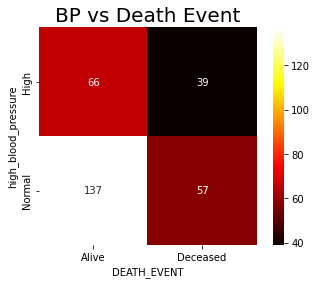

In [ ]:
sns.heatmap(BP_Death,annot=True, fmt='g',square=True,cmap='hot')
plt.title('BP vs Death Event',fontsize=20)
plt.show()

299 data rows are present in the dataset. In order to see whether there is a bias in the data, we will do chi square test with an assumption that there is no bias between the columns.

In [ ]:
BPRatio = BP_Death.sum(axis=1)/299
BPRatio

high_blood_pressure
High      0.351171
Normal    0.648829
dtype: float64

We see that 35.11% of individuals whose details are provided in the existing dataset have high blood pressure while 64.88% have normal blood pressure.


In [ ]:
TotalBP_Death = BP_Death.sum(axis=0)/299
TotalBP_Death

DEATH_EVENT
Alive       0.67893
Deceased    0.32107
dtype: float64

32.10% of all people suffered heart failure

If we have null hypothesis as 'The Heart Failure does not depend on Blood Pressure', then we expect the distribution to be have similar proportions in all columns. That same proportion of people of both survived.

In [ ]:
BPRatio.to_frame()@(TotalBP_Death.to_frame().T) 
# These are the proportion of people expected with null hypothesis

DEATH_EVENT,Alive,Deceased
high_blood_pressure,,
High,0.23842,0.11275
Normal,0.44051,0.20832


In [ ]:
exp = round(BPRatio.to_frame()@(TotalBP_Death.to_frame().T)*299)
exp
# This is the number of people in all classes and survival history expected.

DEATH_EVENT,Alive,Deceased
high_blood_pressure,,
High,71.0,34.0
Normal,132.0,62.0


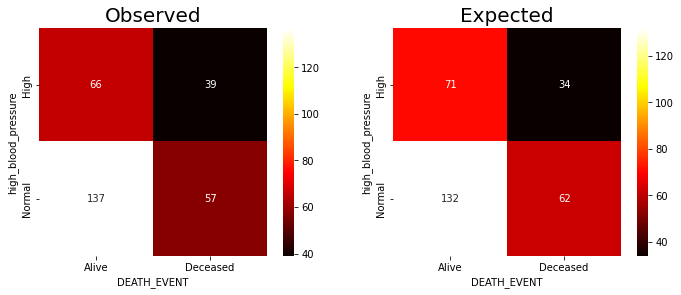

In [ ]:
plt.figure(figsize=(10,4))

plt.subplot('121')
sns.heatmap(BP_Death,annot=True, fmt='g',square=True,cmap='hot')
plt.title('Observed',fontsize=20)

plt.subplot('122')
sns.heatmap(exp,annot=True, fmt='g',square=True,cmap='hot')
plt.title('Expected',fontsize=20)
plt.tight_layout()


plt.show()

There is a little difference between the expected and observed distributions, Still, it is possible that heart failure event is not related to BP. To confirm it, we will find the Chi value and P value

In [ ]:
Chi_table = ((BP_Death - exp)**2)/exp
Chi_table

DEATH_EVENT,Alive,Deceased
high_blood_pressure,,
High,0.352113,0.735294
Normal,0.189394,0.403226


In [ ]:
from scipy.stats.distributions import chi2

Chi_value = Chi_table.sum().sum()

p_value = chi2.sf(Chi_value,1)

print("Chi square value is ",Chi_value)
print("P value is",p_value)

Chi square value is  1.6800265395489493
P value is 0.19492092606957698


In [ ]:
from scipy import stats
chi2_stat, p_val, dof, ex = stats.chi2_contingency(BP_Death)

print("Chi square value is ",chi2_stat)
print("P value is",p_val)
print("Degrees of Freedom:",dof)

Chi square value is  1.5434607612967581
P value is 0.21410341199416902
Degrees of Freedom: 1


In [ ]:
chi_test['High blood pressure']=[chi2_stat, p_val, dof]

This p-value would imply a 21% chance of obtaining the collected data if the null hypothesis of the study were true.
A p value of less than 0.05 is required to reject the null assumptions. But as p value is 0.21 in this case we cannot do that.

So The Heart Failure event is independent of Blood Pressure of an individual




---

<br>
<br>


##<h3> SMOKING

In [ ]:
smoking_Death = pd.pivot_table(dv,index=['smoking'],columns=['DEATH_EVENT'],aggfunc='size')
smoking_Death

DEATH_EVENT,Alive,Deceased
smoking,,
Non-Smoker,137,66
Smoker,66,30


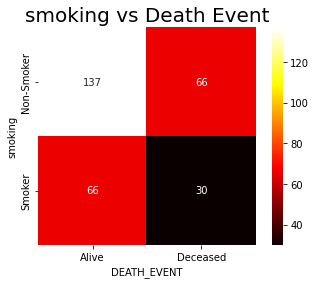

In [ ]:
sns.heatmap(smoking_Death,annot=True, fmt='g',square=True,cmap='hot')
plt.title('smoking vs Death Event',fontsize=20)
plt.show()

299 data rows are present in the dataset. In order to see whether there is a bias in the data, we will do chi square test with an assumption that there is no bias between the columns.

In [ ]:
smokingRatio = smoking_Death.sum(axis=1)/299
smokingRatio

smoking
Non-Smoker    0.67893
Smoker        0.32107
dtype: float64

We see that 67.89% of individuals whose details are provided in the existing dataset are non-smokers while 32.10% are smokers.


In [ ]:
Totalsmoking_Death = smoking_Death.sum(axis=0)/299
Totalsmoking_Death

DEATH_EVENT
Alive       0.67893
Deceased    0.32107
dtype: float64

32.10% of all people suffered heart failure

If we have null hypothesis as 'The Heart Failure is not related to Smoking', then we expect the distribution to be have similar proportions in all columns. That same proportion of people of both survived.

In [ ]:
smokingRatio.to_frame()@(Totalsmoking_Death.to_frame().T) 
# These are the proportion of people expected with null hypothesis

DEATH_EVENT,Alive,Deceased
smoking,,
Non-Smoker,0.460946,0.217984
Smoker,0.217984,0.103086


In [ ]:
exp = round(smokingRatio.to_frame()@(Totalsmoking_Death.to_frame().T)*299)
exp
# This is the number of people in all classes and survival history expected.

DEATH_EVENT,Alive,Deceased
smoking,,
Non-Smoker,138.0,65.0
Smoker,65.0,31.0


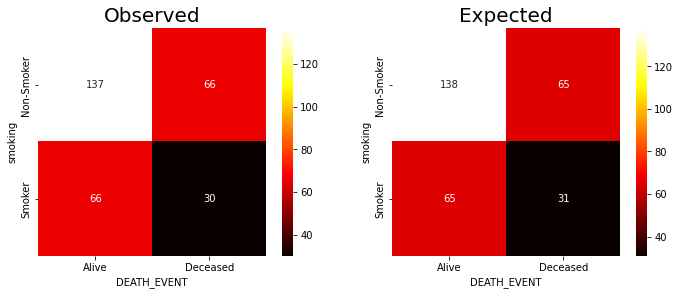

In [ ]:
plt.figure(figsize=(10,4))

plt.subplot('121')
sns.heatmap(smoking_Death,annot=True, fmt='g',square=True,cmap='hot')
plt.title('Observed',fontsize=20)

plt.subplot('122')
sns.heatmap(exp,annot=True, fmt='g',square=True,cmap='hot')
plt.title('Expected',fontsize=20)
plt.tight_layout()


plt.show()

There is a little difference between the expected and observed distributions, Still, it is possible that heart failure event is not related to smoking. To confirm it, we will find the Chi value and P value

In [ ]:
Chi_table = ((smoking_Death - exp)**2)/exp
Chi_table

DEATH_EVENT,Alive,Deceased
smoking,,
Non-Smoker,0.007246,0.015385
Smoker,0.015385,0.032258


In [ ]:
from scipy.stats.distributions import chi2

Chi_value = Chi_table.sum().sum()

p_value = chi2.sf(Chi_value,1)

print("Chi square value is ",Chi_value)
print("P value is",p_value)

Chi square value is  0.07027367209695401
P value is 0.7909387300379515


In [ ]:
from scipy import stats
chi2_stat, p_val, dof, ex = stats.chi2_contingency(smoking_Death)

print("Chi square value is ",chi2_stat)
print("P value is",p_val)
print("Degrees of Freedom:",dof)

Chi square value is  0.007331473567119502
P value is 0.9317652998235507
Degrees of Freedom: 1


In [ ]:
chi_test['Smoking']=[chi2_stat, p_val, dof]

This p-value would imply a 93% chance of obtaining the collected data if the null hypothesis of the study were true.
A p value of less than 0.05 is required to reject the null assumptions. But as p value is 0.93 in this case we cannot do that.

So The Heart Failure event is independent of smoking habits of an individual.




---
<br>
<br>



##<h3> AGE

Let us consider initially determining the confidence level of 95%, which also implies that we will accept only an error rate of 5%.

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('age ~ C(DEATH_EVENT)', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(DEATH_EVENT),2714.375124,1.0,20.435946,0.000009
Residual,39448.596783,297.0,NaN,NaN


This table provides all the information one needs in order to interprete if the results are significant

In [ ]:
mymod = ols('age ~ DEATH_EVENT', data = df).fit()  
# performing type 2 anova test  
aovtable = sm.stats.anova_lm(mymod, typ = 2)  
print('ANOVA table for Age parameter')  
print('----------------------')  
print(aovtable)  
print()  

ANOVA table for Age parameter
----------------------
                   sum_sq     df          F    PR(>F)
DEATH_EVENT   2714.375124    1.0  20.435946  0.000009
Residual     39448.596783  297.0        NaN       NaN



In [ ]:
F= 20.435946
P_value=8.916762946533455e-06	
anova_test['Age']=[F,P_value]

In [ ]:
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']

    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])

    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])

    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(DEATH_EVENT),2714.375124,1.0,2714.375124,20.435946,0.000009,0.064378,0.061036
Residual,39448.596783,297.0,132.823558,NaN,NaN,NaN,NaN


omega_sq is considered a better measure of effect size since it is unbiased in it's calculation by accounting for the degrees of freedom in the model.

In [ ]:
import scipy.stats as stats

stats.shapiro(model.resid)

ShapiroResult(statistic=0.9828832745552063, pvalue=0.0012243605451658368)

The test is significant, W= 0.9828, p= 0.0012, which indicates that the null hypothesis is wrong and Age is an important factor.



---
<br>
<br>



##<h3> EJECTION FRACTION

Let us consider initially determining the confidence level of 95%, which also implies that we will accept only an error rate of 5%.

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('ejection_fraction ~ C(DEATH_EVENT)', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(DEATH_EVENT),3011.367981,1.0,23.094063,0.000002
Residual,38727.541718,297.0,NaN,NaN


This table provides all the information one needs in order to interprete if the results are significant

In [ ]:
mymod = ols('ejection_fraction ~ DEATH_EVENT', data = df).fit()  
# performing type 2 anova test  
aovtable = sm.stats.anova_lm(mymod, typ = 2)  
print('ANOVA table for Age parameter')  
print('----------------------')  
print(aovtable)  
print()  

ANOVA table for Age parameter
----------------------
                   sum_sq     df          F    PR(>F)
DEATH_EVENT   3011.367981    1.0  23.094063  0.000002
Residual     38727.541718  297.0        NaN       NaN



In [ ]:
F=23.094063
P_value=2.452897418208454e-06
anova_test['Ejection Fraction']=[F,P_value]

In [ ]:
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']

    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])

    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])

    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(DEATH_EVENT),3011.367981,1.0,3011.367981,23.094063,0.000002,0.072148,0.068809
Residual,38727.541718,297.0,130.395763,NaN,NaN,NaN,NaN


omega_sq is considered a better measure of effect size since it is unbiased in it's calculation by accounting for the degrees of freedom in the model.

In [ ]:
import scipy.stats as stats

stats.shapiro(model.resid)

ShapiroResult(statistic=0.9447028040885925, pvalue=3.6950720261330616e-09)

The test is significant, W= 0.9447, p far far less than 0.05, which indicates that the null hypothesis is wrong. Thus Ejection Fraction is an important factor.



---
<br>
<br>



##<h3> CREATININE PHOSPHOKINASE

Let us consider initially determining the confidence level of 95%, which also implies that we will accept only an error rate of 5%.

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('creatinine_phosphokinase ~ C(DEATH_EVENT)', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(DEATH_EVENT),1.103933e+06,1.0,1.173259,0.279611
Residual,2.794507e+08,297.0,NaN,NaN


This table provides all the information one needs in order to interprete if the results are significant

In [ ]:
mymod = ols('creatinine_phosphokinase ~ DEATH_EVENT', data = df).fit()  
# performing type 2 anova test  
aovtable = sm.stats.anova_lm(mymod, typ = 2)  
print('ANOVA table for Age parameter')  
print('----------------------')  
print(aovtable)  
print()  

ANOVA table for Age parameter
----------------------
                   sum_sq     df         F    PR(>F)
DEATH_EVENT  1.103933e+06    1.0  1.173259  0.279611
Residual     2.794507e+08  297.0       NaN       NaN



In [ ]:
F=1.173259
P_value= 0.279611
anova_test['Creatinine Phosphokinase']=[F, P_value]

In [ ]:
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']

    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])

    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])

    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(DEATH_EVENT),1.103933e+06,1.0,1.103933e+06,1.173259,0.279611,0.003935,0.000579
Residual,2.794507e+08,297.0,9.409115e+05,NaN,NaN,NaN,NaN


omega_sq is considered a better measure of effect size since it is unbiased in it's calculation by accounting for the degrees of freedom in the model.

In [ ]:
import scipy.stats as stats

stats.shapiro(model.resid)

ShapiroResult(statistic=0.5299349427223206, pvalue=1.6357177240433453e-27)

The test is significant, W= 0.9828, p is far far less than 0.05. Thus the null hypothesis is wrong. Creatinine Phosphokinase is an important factor.



---
<br>
<br>



##<h3> PLATELETS



Let us consider initially determining the confidence level of 95%, which also implies that we will accept only an error rate of 5%.

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('platelets ~ C(DEATH_EVENT)', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(DEATH_EVENT),6.883065e+09,1.0,0.71888,0.397194
Residual,2.843686e+12,297.0,NaN,NaN


This table provides all the information one needs in order to interprete if the results are significant

In [ ]:
mymod = ols('platelets ~ DEATH_EVENT', data = df).fit()  
# performing type 2 anova test  
aovtable = sm.stats.anova_lm(mymod, typ = 2)  
print('ANOVA table for Platelets parameter')  
print('----------------------')  
print(aovtable)  
print()  

ANOVA table for Platelets parameter
----------------------
                   sum_sq     df        F    PR(>F)
DEATH_EVENT  6.883065e+09    1.0  0.71888  0.397194
Residual     2.843686e+12  297.0      NaN       NaN



In [ ]:
F=0.71888
P_value= 0.397194
anova_test['Platelets']=[F, P_value]

In [ ]:
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']

    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])

    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])

    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(DEATH_EVENT),6.883065e+09,1.0,6.883065e+09,0.71888,0.397194,0.002415,-0.000941
Residual,2.843686e+12,297.0,9.574701e+09,NaN,NaN,NaN,NaN


omega_sq is considered a better measure of effect size since it is unbiased in it's calculation by accounting for the degrees of freedom in the model.

In [ ]:
import scipy.stats as stats

stats.shapiro(model.resid)

ShapiroResult(statistic=0.9117235541343689, pvalue=3.0009211261783353e-12)

The test is significant, W= 0.9117, p is far far less than 0.05. Thus the null hypothesis is wrong. Creatinine Phosphokinase is an important factor.



---
<br>
<br>



##<h3> SERUM CREATININE

Let us consider initially determining the confidence level of 95%, which also implies that we will accept only an error rate of 5%.

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('serum_creatinine ~ C(DEATH_EVENT)', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(DEATH_EVENT),27.618494,1.0,28.158492,2.190198e-07
Residual,291.304405,297.0,NaN,NaN


This table provides all the information one needs in order to interprete if the results are significant

In [ ]:
mymod = ols('serum_creatinine ~ DEATH_EVENT', data = df).fit()  
# performing type 2 anova test  
aovtable = sm.stats.anova_lm(mymod, typ = 2)  
print('ANOVA table for Age parameter')  
print('----------------------')  
print(aovtable)  
print()  

ANOVA table for Age parameter
----------------------
                 sum_sq     df          F        PR(>F)
DEATH_EVENT   27.618494    1.0  28.158492  2.190198e-07
Residual     291.304405  297.0        NaN           NaN



In [ ]:
F=28.158492
P_value= 2.190198e-07
anova_test['Serum Creatinine']=[F, P_value]

In [ ]:
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']

    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])

    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])

    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(DEATH_EVENT),27.618494,1.0,27.618494,28.158492,2.190198e-07,0.086599,0.083268
Residual,291.304405,297.0,0.980823,NaN,NaN,NaN,NaN


omega_sq is considered a better measure of effect size since it is unbiased in it's calculation by accounting for the degrees of freedom in the model.

In [ ]:
import scipy.stats as stats

stats.shapiro(model.resid)

ShapiroResult(statistic=0.5933622121810913, pvalue=6.288357867353048e-26)

The test is significant, W= 0.9828, p is far far less than 0.05. Thus The null hypothesis is wrong. So, serum creatinine is an important factor.



---
<br>
<br>



##<h3> SERUM SODIUM

Let us consider initially determining the confidence level of 95%, which also implies that we will accept only an error rate of 5%.

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('serum_sodium ~ C(DEATH_EVENT)', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(DEATH_EVENT),221.083769,1.0,11.765331,0.000689
Residual,5580.963054,297.0,NaN,NaN


This table provides all the information one needs in order to interprete if the results are significant

In [ ]:
mymod = ols('serum_sodium ~ DEATH_EVENT', data = df).fit()  
# performing type 2 anova test  
aovtable = sm.stats.anova_lm(mymod, typ = 2)  
print('ANOVA table for Age parameter')  
print('----------------------')  
print(aovtable)  
print()  

ANOVA table for Age parameter
----------------------
                  sum_sq     df          F    PR(>F)
DEATH_EVENT   221.083769    1.0  11.765331  0.000689
Residual     5580.963054  297.0        NaN       NaN



In [ ]:
F=11.765331
P_value= 0.000689
anova_test['Serum Sodium']=[F, P_value]

In [ ]:
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']

    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])

    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])

    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(DEATH_EVENT),221.083769,1.0,221.083769,11.765331,0.000689,0.038104,0.034753
Residual,5580.963054,297.0,18.791121,NaN,NaN,NaN,NaN


omega_sq is considered a better measure of effect size since it is unbiased in it's calculation by accounting for the degrees of freedom in the model.

In [ ]:
import scipy.stats as stats

stats.shapiro(model.resid)

ShapiroResult(statistic=0.9417030811309814, pvalue=1.7547701069986488e-09)

The test is significant, W= 0.9828, p is far far less than 0.05. So, null hypothesis is wrong. Thus, serum sodium is an important factor.

##<h3> TIME

Let us consider initially determining the confidence level of 95%, which also implies that we will accept only an error rate of 5%.

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('time ~ C(DEATH_EVENT)', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(DEATH_EVENT),4.984944e+05,1.0,114.181264,9.122223e-23
Residual,1.296647e+06,297.0,NaN,NaN


This table provides all the information one needs in order to interprete if the results are significant

In [ ]:
mymod = ols('time ~ DEATH_EVENT', data = df).fit()  
# performing type 2 anova test  
aovtable = sm.stats.anova_lm(mymod, typ = 2)  
print('ANOVA table for Age parameter')  
print('----------------------')  
print(aovtable)  
print()  

ANOVA table for Age parameter
----------------------
                   sum_sq     df           F        PR(>F)
DEATH_EVENT  4.984944e+05    1.0  114.181264  9.122223e-23
Residual     1.296647e+06  297.0         NaN           NaN



In [ ]:
F=114.181264
P_value= 9.122223e-23
anova_test['Time']=[F, P_value]

In [ ]:
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']

    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])

    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])

    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(DEATH_EVENT),4.984944e+05,1.0,498494.365793,114.181264,9.122223e-23,0.277691,0.274591
Residual,1.296647e+06,297.0,4365.815779,NaN,NaN,NaN,NaN


omega_sq is considered a better measure of effect size since it is unbiased in it's calculation by accounting for the degrees of freedom in the model.

In [ ]:
import scipy.stats as stats

stats.shapiro(model.resid)

ShapiroResult(statistic=0.9609566926956177, pvalue=3.435970938880928e-07)

The test is significant, W= 0.9828, p is far far less than 0.05. Thus The null hypothesis is wrong. So, serum creatinine is an important factor.

##<H4> Result of Filter Methods- Chi squared test, Anova test

In [ ]:
chi_test

{'Anaemia': [1.042175485287005, 0.3073160508415107, 1],
 'Diabetes': [0.0, 1.0, 1],
 'High blood pressure': [1.5434607612967581, 0.21410341199416902, 1],
 'Sex': [0.0, 1.0, 1],
 'Smoking': [0.007331473567119502, 0.9317652998235507, 1]}

In [ ]:
chi_test_df = pd.DataFrame.from_dict(chi_test).T
chi_test_df.columns = ['Chi-square value','P value', 'Degree of Freedom']
#chi_test_df = chi_test_df.sort_values('ROC AUC Score', ascending=True)
chi_test_df.style.background_gradient(cmap='magma')

,Chi-square value,P value,Degree of Freedom
Sex,0.000000,1.000000,1.000000
Anaemia,1.042175,0.307316,1.000000
Diabetes,0.000000,1.000000,1.000000
High blood pressure,1.543461,0.214103,1.000000
Smoking,0.007331,0.931765,1.000000


In [ ]:
anova_test

{'Age': [20.435946, 8.916762946533455e-06],
 'Creatinine Phosphokinase': [1.173259, 0.279611],
 'Ejection Fraction': [23.094063, 2.452897418208454e-06],
 'Platelets': [0.71888, 0.397194],
 'Serum Creatinine': [28.158492, 2.190198e-07],
 'Serum Sodium': [11.765331, 0.000689],
 'Time': [114.181264, 9.122223e-23]}

In [ ]:
anova_test_df = pd.DataFrame.from_dict(anova_test).T
anova_test_df.columns = ['F value','P value']
#anova_test_df = anova_test_df.sort_values('ROC AUC Score', ascending=True)
anova_test_df.style.background_gradient(cmap='magma')

,F value,P value
Age,20.435946,0.000009
Ejection Fraction,23.094063,0.000002
Creatinine Phosphokinase,1.173259,0.279611
Serum Creatinine,28.158492,0.000000
Serum Sodium,11.765331,0.000689
Time,114.181264,0.000000
Platelets,0.718880,0.397194


<ul>
<li> Important features:
<br>
<table align="left">
<tr>
<th> Features </th>
<th> PR(>F) </th>
<th> P value
</tr>
<tr>
<td> Age</td>
<td>0.000002
<td>0.0012243605451658368
</tr>
<tr>
<td> Ejection Fraction </td>
<td>0.000002
<td>3.6950720261330616e-09
</tr>
<tr>
<td> Creatinine Phosphokinase </td>
<td>0.279611
<td> 1.6357177240433453e-27

</tr>
<tr>
<td> Serum Sodium </td>
<td>0.000689
<td> 1.7547701069986488e-09
</tr>
<tr>
<td> Serum Creatinine</td>
<td>2.190198e-07
<td> 6.288357867353048e-26

</tr>
<tr>
<td> Time </td>
<td>9.122223e-23
<td> 3.435970938880928e-07
</tr>

</table>
</li>
<br>
<br>


<b> The top 3 features according to the Anova test and chi squared test are
<ul>
<li> Time
<li> Serum Creatinine
<li> Ejection Fraction

##<hr>
<br>
<br>
<br>

# <h1 align="center"> Logistic Regression </h1>

---



---



In [ ]:
lr=LogisticRegression(solver='lbfgs', max_iter=100)
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred_test= lr.predict(x_test)
y_pred_test

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In [ ]:
y_pred_train= lr.predict(x_train)
y_pred_train

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [ ]:
print("Training accuracy:")
print( accuracy_score(y_train, y_pred_train)*100)

Training accuracy:
86.61087866108787


In [ ]:
print("Testing accuracy:")
print( accuracy_score(y_test, y_pred_test)*100)

Testing accuracy:
78.33333333333333


## <h3> RFE Feature Selection

>1 0.844 (0.072)
>2 0.831 (0.085)
>3 0.845 (0.073)
>4 0.851 (0.080)
>5 0.837 (0.069)
>6 0.836 (0.074)
>7 0.842 (0.079)
>8 0.841 (0.091)
>9 0.833 (0.085)
>10 0.834 (0.091)
>11 0.834 (0.085)


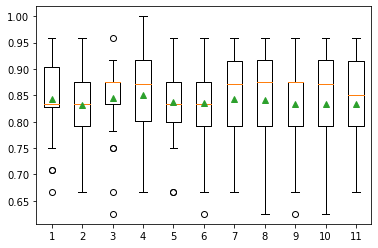

In [ ]:
# explore the number of selected features for RFE

# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(1, 12):
		rfe = RFE(estimator=LogisticRegression(), n_features_to_select=i)
		model = LogisticRegression()
		models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
# define dataset
X, y = x_train, y_train
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [ ]:
# automatically select the number of features for RFE

# create pipeline
rfe = RFECV(estimator=LogisticRegression())
model = LogisticRegression()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.845 (0.071)


In [ ]:
# report which features were selected by RFE

# define dataset
X, y = x_train, y_train
# define RFE
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=3)
# fit RFE
rfe.fit(X, y)
# summarize all features
for i in range(X.shape[1]):
	print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected True, Rank: 1.000
Column: 1, Selected False, Rank: 9.000
Column: 2, Selected False, Rank: 3.000
Column: 3, Selected False, Rank: 6.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected False, Rank: 7.000
Column: 6, Selected False, Rank: 8.000
Column: 7, Selected False, Rank: 2.000
Column: 8, Selected False, Rank: 5.000
Column: 9, Selected False, Rank: 4.000
Column: 10, Selected False, Rank: 10.000
Column: 11, Selected True, Rank: 1.000


##<H3> Result of Wrappers Method- RFE 

In [ ]:
# report which features were selected by RFE

# define dataset
X, y = x_train, y_train
# define RFE
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=5)
# fit RFE
rfe.fit(X, y)
# summarize all features
for i in range(X.shape[1]):
	print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected True, Rank: 1.000
Column: 1, Selected False, Rank: 7.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected False, Rank: 4.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected False, Rank: 5.000
Column: 6, Selected False, Rank: 6.000
Column: 7, Selected True, Rank: 1.000
Column: 8, Selected False, Rank: 3.000
Column: 9, Selected False, Rank: 2.000
Column: 10, Selected False, Rank: 8.000
Column: 11, Selected True, Rank: 1.000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


<b> The top 5 features according to Linear Regression model by applying RFE are:
<ol>
<li> Time
<li> ejection Fraction
<li> Age
<li> Serum Creatinine
<li> Creatinine Phosphokinase

# <h1 align="center"> Random Forest </h1>

---



---



In [ ]:
clf = RandomForestClassifier(n_estimators = 10, random_state =0)
clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [ ]:
y_pred_test= clf.predict(x_test)
y_pred_test

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0])

In [ ]:
y_pred_train= clf.predict(x_train)
y_pred_train

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [ ]:
print("Training accuracy:")
print( accuracy_score(y_train, y_pred_train)*100)

Training accuracy:
97.90794979079497


In [ ]:
print("Testing accuracy:")
print( accuracy_score(y_test, y_pred_test)*100)

Testing accuracy:
80.0


## Prediction with RFE

In [ ]:
clf = RandomForestClassifier(n_estimators = 10, random_state =0)
clf.fit(xf_train,yf_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [ ]:
yf_pred_test= clf.predict(xf_test)
yf_pred_test

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In [ ]:
yf_pred_train= clf.predict(xf_train)
yf_pred_train

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [ ]:
print("Training accuracy:")
print( accuracy_score(yf_train, yf_pred_train)*100)

Training accuracy:
98.32635983263597


In [ ]:
print("Testing accuracy:")
print( accuracy_score(yf_test, yf_pred_test)*100)

Testing accuracy:
81.66666666666667


## Random Forest Importance

In [ ]:
from sklearn.ensemble import RandomForestClassifier

feats= df.iloc[:,:-1]
labels= df.iloc[:,-1]

x_train, x_devel, y_train, y_devel= train_test_split(feats, labels, test_size= 0.1, random_state= 20)

#create and train a random forest
forest= RandomForestClassifier(n_estimators= 1000, random_state= 20)
forest.fit(x_train, y_train)

#get the most important features
forest_feats= SelectFromModel(forest, threshold= 'median')
forest_feats.fit(x_train, y_train)

#get training and development sets that have only the most important features
x_train_forest= forest_feats.transform(x_train)
x_devel_forest= forest_feats.transform(x_devel)

#see which features were retained
for i in forest_feats.get_support(indices= True):
    print(x_train.columns[i])

age
creatinine_phosphokinase
ejection_fraction
platelets
serum_creatinine
time


## <h3> Result of Embedded Method- RFI

<b> The top 6 features of the provided dataset according to the random forest importance are:
<ol>
<li> Age
<li> Creatinine Phosphokinase
<li> Ejection Fraction
<li> Time
<li> Platelets
<li> Serum Creatinine

## <h3> Prediction with Random Forest Importance

In [ ]:
clf = RandomForestClassifier(n_estimators = 10, random_state =0)
clf.fit(xr_train,yr_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [ ]:
yr_pred_test= clf.predict(xr_test)
yr_pred_test

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In [ ]:
yr_pred_train= clf.predict(xr_train)
yr_pred_train

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [ ]:
print("Training accuracy:")
print( accuracy_score(yr_train, yr_pred_train)*100)

Training accuracy:
97.90794979079497


In [ ]:
print("Testing accuracy:")
print( accuracy_score(yr_test, yr_pred_test)*100)

Testing accuracy:
81.66666666666667


## <h1 align="center"> Confusion Matrix </h1>

---



---



In [ ]:
y_pred = y_pred_test
cm = confusion_matrix(y_test, y_pred)

In [ ]:
print('Confusion matrix\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix
 [[32  5]
 [ 8 15]]

True Positives(TP) =  32

True Negatives(TN) =  15

False Positives(FP) =  5

False Negatives(FN) =  8


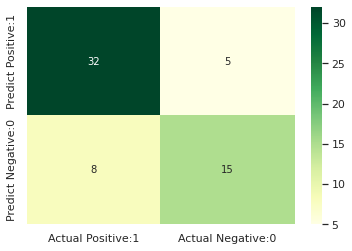

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83        37
           1       0.75      0.65      0.70        23

    accuracy                           0.78        60
   macro avg       0.78      0.76      0.76        60
weighted avg       0.78      0.78      0.78        60



In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2167


In [ ]:
f1score = f1_score(y_test, y_pred)
accuracy= accuracy_score(y_test, y_pred)
precision= precision_score(y_test, y_pred)
recall= recall_score(y_test, y_pred)
roc_auc= roc_auc_score(y_test, y_pred)
model_test['Random Forest']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)

f1 Score : 0.6976744186046512
Accuracy: 0.7833333333333333
Recall : 0.6521739130434783
Precision : 0.75
ROC_AUC : 0.7585193889541716


# <h1 align="center"> Decision Tree </h1>

---



---



In [ ]:
tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_train = tree.predict(x_train)
y_pred_train

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0])

In [ ]:
y_pred_test = tree.predict(x_test)
y_pred_test

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0])

In [ ]:
print("Training accuracy:")
print( accuracy_score(y_train, y_pred_train)*100)

Training accuracy:
100.0


In [ ]:
print("Testing accuracy:")
print( accuracy_score(y_test, y_pred_test)*100)

Testing accuracy:
78.33333333333333


##<h3> RFE Feature Selection

>1 0.821 (0.082)
>2 0.769 (0.075)
>3 0.762 (0.075)
>4 0.754 (0.093)
>5 0.774 (0.080)
>6 0.798 (0.074)
>7 0.775 (0.089)
>8 0.780 (0.081)
>9 0.775 (0.087)
>10 0.774 (0.084)
>11 0.770 (0.077)


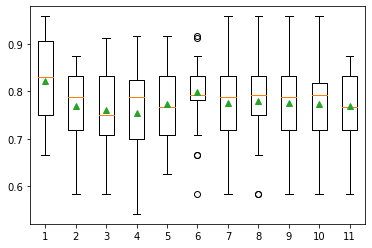

In [ ]:
# explore the number of selected features for RFE
 
# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(1, 12):
		rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
		model = DecisionTreeClassifier()
		models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
# define dataset
X, y = x_train, y_train
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [ ]:
# automatically select the number of features for RFE

# create pipeline
rfe = RFECV(estimator=DecisionTreeClassifier())
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.809 (0.088)


##<h3> Result of Wrappers Method- RFE

In [ ]:
# report which features were selected by RFE

# define dataset
X, y = x_train, y_train
# define RFE
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=6)
# fit RFE
rfe.fit(X, y)
# summarize all features
for i in range(X.shape[1]):
	print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected True, Rank: 1.000
Column: 1, Selected False, Rank: 4.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected False, Rank: 6.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected False, Rank: 2.000
Column: 6, Selected False, Rank: 7.000
Column: 7, Selected True, Rank: 1.000
Column: 8, Selected True, Rank: 1.000
Column: 9, Selected False, Rank: 3.000
Column: 10, Selected False, Rank: 5.000
Column: 11, Selected True, Rank: 1.000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


<b> The top 6 features according to Decision Tree classifier model by applying RFE are:
<ol>
<li> Age
<li> Creatinine Phosphokinase
<li> Ejection Fraction
<li> Serum Creatinine
<li> Serum Sodium
<li> Time

# <h1 align="center">LightGBM </h1>

---



---

In [ ]:
clf = LGBMClassifier()
clf.fit(x_train,y_train)

LGBMClassifier()

In [ ]:
#Prediction
y_pred_train = clf.predict(x_train)
y_pred_train

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0])

In [ ]:
#Prediction
y_pred_test = clf.predict(x_test)
y_pred_test

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In [ ]:
print("Training accuracy:")
print( accuracy_score(y_train, y_pred_train)*100)

Training accuracy:
100.0


In [ ]:
print("Testing accuracy:")
print( accuracy_score(y_test, y_pred_test)*100)

Testing accuracy:
83.33333333333334


## Prediction with RFE

In [ ]:
clf = LGBMClassifier()
clf.fit(xf_train,yf_train)

LGBMClassifier()

In [ ]:
#Prediction
yf_pred_train = clf.predict(xf_train)
yf_pred_train

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0])

In [ ]:
#Prediction
yf_pred_test = clf.predict(xf_test)
yf_pred_test

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0])

In [ ]:
print("Training accuracy:")
print( accuracy_score(yf_train, yf_pred_train)*100)

Training accuracy:
99.581589958159


In [ ]:
print("Testing accuracy:")
print( accuracy_score(yf_test, yf_pred_test)*100)

Testing accuracy:
78.33333333333333


## <h3> Prediction with Random Forest Importance


In [ ]:
clf = LGBMClassifier()
clf.fit(xr_train,yr_train)

LGBMClassifier()

In [ ]:
#Prediction
yr_pred_train = clf.predict(xr_train)
yr_pred_train

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0])

In [ ]:
#Prediction
yr_pred_test = clf.predict(xr_test)
yr_pred_test

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0])

In [ ]:
print("Training accuracy:")
print( accuracy_score(yr_train, yr_pred_train)*100)

Training accuracy:
100.0


In [ ]:
print("Testing accuracy:")
print( accuracy_score(yr_test, yr_pred_test)*100)

Testing accuracy:
80.0


## <h1 align="center"> Confusion Matrix </h1>

---



---



In [ ]:
y_pred = y_pred_test
cm = confusion_matrix(y_test, y_pred)

In [ ]:
print('Confusion matrix\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix
 [[35  2]
 [ 8 15]]

True Positives(TP) =  35

True Negatives(TN) =  15

False Positives(FP) =  2

False Negatives(FN) =  8


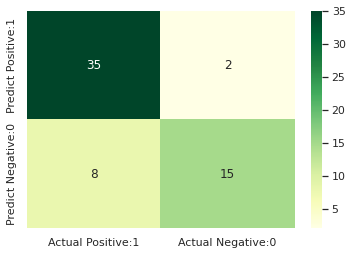

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.95      0.88        37
           1       0.88      0.65      0.75        23

    accuracy                           0.83        60
   macro avg       0.85      0.80      0.81        60
weighted avg       0.84      0.83      0.83        60



In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1667


In [ ]:
f1score = f1_score(y_test, y_pred)
accuracy= accuracy_score(y_test, y_pred)
precision= precision_score(y_test, y_pred)
recall= recall_score(y_test, y_pred)
roc_auc= roc_auc_score(y_test, y_pred)
model_test['LightGBM']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)

f1 Score : 0.75
Accuracy: 0.8333333333333334
Recall : 0.6521739130434783
Precision : 0.8823529411764706
ROC_AUC : 0.799059929494712


# <h1 align="center"> XGBoost <h1>

---



---

In [ ]:
xg = XGBClassifier()
xg.fit(x_train, y_train)

XGBClassifier()

In [ ]:
y_pred_train = xg.predict(x_train)
#convert into binary values
for i in range(0, len(y_pred_train)):
    if y_pred_train[i]>= 0.5:       # setting threshold to .5
       y_pred_train[i]=1
    else:  
       y_pred_train[i]=0
y_pred_train

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0])

In [ ]:
y_pred_test = xg.predict(x_test)
for i in range(0, len(y_pred_test)):
    if y_pred_test[i]>= 0.5:       # setting threshold to .5
       y_pred_test[i]=1
    else:  
       y_pred_test[i]=0
y_pred_test

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0])

In [ ]:
print("Training accuracy:")
print( accuracy_score(y_train, y_pred_train)*100)

Training accuracy:
99.16317991631799


In [ ]:
print("Testing accuracy:")
print( accuracy_score(y_test, y_pred_test)*100)

Testing accuracy:
85.0


## Prediction with RFE

In [ ]:
xg = XGBClassifier()
xg.fit(xf_train, yf_train)

XGBClassifier()

In [ ]:
yf_pred_train = xg.predict(xf_train)
#convert into binary values
for i in range(0, len(yf_pred_train)):
    if yf_pred_train[i]>= 0.5:       # setting threshold to .5
       yf_pred_train[i]=1
    else:  
       yf_pred_train[i]=0
yf_pred_train

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0])

In [ ]:
yf_pred_test = xg.predict(xf_test)
for i in range(0, len(yf_pred_test)):
    if yf_pred_test[i]>= 0.5:       # setting threshold to .5
       yf_pred_test[i]=1
    else:  
       yf_pred_test[i]=0
yf_pred_test

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0])

In [ ]:
print("Training accuracy:")
print( accuracy_score(y_train, yf_pred_train)*100)

Training accuracy:
96.65271966527197


In [ ]:
print("Testing accuracy:")
print( accuracy_score(yf_test, yf_pred_test)*100)

Testing accuracy:
83.33333333333334


##<h3> Prediction with Random Forest Importance


In [ ]:
xg = XGBClassifier()
xg.fit(xr_train, yr_train)

XGBClassifier()

In [ ]:
yr_pred_train = xg.predict(xr_train)
#convert into binary values
for i in range(0, len(yr_pred_train)):
    if yr_pred_train[i]>= 0.5:       # setting threshold to .5
       yr_pred_train[i]=1
    else:  
       yr_pred_train[i]=0
yr_pred_train

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0])

In [ ]:
yr_pred_test = xg.predict(xr_test)
for i in range(0, len(yr_pred_test)):
    if yr_pred_test[i]>= 0.5:       # setting threshold to .5
       yr_pred_test[i]=1
    else:  
       yr_pred_test[i]=0
yr_pred_test

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0])

In [ ]:
print("Training accuracy:")
print( accuracy_score(yr_train, yr_pred_train)*100)

Training accuracy:
97.90794979079497


In [ ]:
print("Testing accuracy:")
print( accuracy_score(yr_test, yr_pred_test)*100)

Testing accuracy:
83.33333333333334


## <h1 align="center"> Confusion Matrix </h1>

---



---



In [ ]:
y_pred = y_pred_test
cm = confusion_matrix(y_test, y_pred)

In [ ]:
print('Confusion matrix\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix
 [[35  2]
 [ 7 16]]

True Positives(TP) =  35

True Negatives(TN) =  16

False Positives(FP) =  2

False Negatives(FN) =  7


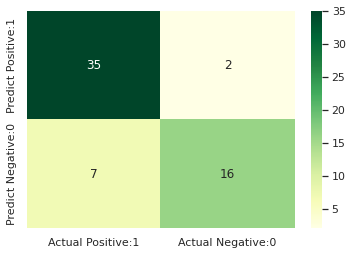

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89        37
           1       0.89      0.70      0.78        23

    accuracy                           0.85        60
   macro avg       0.86      0.82      0.83        60
weighted avg       0.85      0.85      0.85        60



In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1500


In [ ]:
f1score = f1_score(y_test, y_pred)
accuracy= accuracy_score(y_test, y_pred)
precision= precision_score(y_test, y_pred)
recall= recall_score(y_test, y_pred)
roc_auc= roc_auc_score(y_test, y_pred)
model_test['XGBoost']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)

f1 Score : 0.7804878048780488
Accuracy: 0.85
Recall : 0.6956521739130435
Precision : 0.8888888888888888
ROC_AUC : 0.8207990599294948


# <h3> References: </h3>

---




---



1.   https://www.cdc.gov/heartdisease/heart_failure.htm
2.   Epidemiology of heart failure- https://onlinelibrary.wiley.com/doi/full/10.1002/ejhf.1858#.YsYuepL1Q38.twitter 
3. https://towardsdatascience.com/heart-disease-prediction-73468d630cfc
4. Citation-
Davide Chicco, Giuseppe Jurman: Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Medical Informatics and Decision Making 20, 16 (2020). (link)
5. License-
CC BY 4.0
6. Splash icon-
Icon by Freepik, available on Flaticon.
7. Splash banner-
Wallpaper by jcomp, available on Freepik.





